In [2]:
import pandas  as pd
df = pd.read_csv('test1_modify.csv')
df

,year,month,day,hour,minute,second,dayofweek,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,1,0,0,0,5,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011,1,1,1,0,0,5,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011,1,1,2,0,0,5,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011,1,1,3,0,0,5,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011,1,1,4,0,0,5,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,19,0,0,2,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012,12,19,20,0,0,2,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012,12,19,21,0,0,2,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012,12,19,22,0,0,2,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# Data Preparation

In [3]:
df.columns

Index(['year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek',
       'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
# feature - label split 
features = ['year', 'month', 'day', 'hour', 'dayofweek',
       'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed']
label = 'count'

In [5]:
df.shape

(10886, 18)

In [6]:
# tarin - test split 1- 8:2, 2 - 7:3 (american 7.5 : 2.5 )

train, test = df[0::2], df[1::2]   # 5:5

train, test = train.reset_index(), test.reset_index()

In [7]:
print(train.shape, test.shape)

(5443, 19) (5443, 19)


In [8]:
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

In [9]:
print(X_train.shape, y_train.shape)

(5443, 13) (5443,)


In [10]:
X_train

,year,month,day,hour,dayofweek,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011,1,1,0,5,1,0,0,1,9.84,14.395,81,0.0000
1,2011,1,1,2,5,1,0,0,1,9.02,13.635,80,0.0000
2,2011,1,1,4,5,1,0,0,1,9.84,14.395,75,0.0000
3,2011,1,1,6,5,1,0,0,1,9.02,13.635,80,0.0000
4,2011,1,1,8,5,1,0,0,1,9.84,14.395,75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5438,2012,12,19,14,2,4,0,1,1,17.22,21.210,50,12.9980
5439,2012,12,19,16,2,4,0,1,1,17.22,21.210,50,23.9994
5440,2012,12,19,18,2,4,0,1,1,15.58,19.695,50,23.9994
5441,2012,12,19,20,2,4,0,1,1,14.76,17.425,57,15.0013


# Modelling - 속도, 예측력, 해석력 -- trade off
- Planning, Building

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
model = RandomForestRegressor()

In [13]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
model.score(X_test, y_test)

0.9233618685658451

In [15]:
model.score(X_train, y_train)

0.9922223186718508

# 회귀 모델
- 회귀(reggression): 두 변수(column, Target) 사이의 상관관계를 분석하는 방법
- 임의의 어떤 숫자(역속적인 값: 가격, 매출, 주가, ....)를 예측하는 문제
- 알고리즘: k-최근접 이웃 회귀, 선형(Liner) 회귀, 다중회귀 등

## Overfitting 
- 샘플에 모델이 너무 과하게 적합되어 있는 상태

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
model_dt.score(X_test, y_test)

0.8604665144307124

In [19]:
# 과적합 발생 - 알고리증의 점수 예시

model_dt.score(X_train, y_train)

# 일반화(Generalization) 실패
# Decision Tree -> train 데이터셋을 100% 외우고 있음.

1.0

# 다양한 회귀문제 평가 지표
- R(Root), M(Mean), S(Squard), P(Percentile), A(Absolute), E(Error)
- MAE, MSE, MAPE, RMSE, RMSLE

In [20]:
import numpy as np

In [21]:
# 2 - 1 = 1
# 1002 - 1001 = 1

err1 = np.log(2) - np.log(1)
err2 = np.log(1002) - np.log(1001)

print(err1, err2)

# 작은 값들끼리의 차이와
# 큰 값들끼리의 차이에 차등을 두기위해서 log() 함수를 사용

0.6931471805599453 0.0009985023295895346


# 평가지표의 값이 높고 낮음의 의미를 시각화

In [22]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
model.predict(X_test)

array([ 21.18,  16.85,   3.32, ..., 410.81, 216.68, 130.24], shape=(5443,))

In [24]:
for_plot = pd.DataFrame()
for_plot['train_predict'] = model.predict(X_train)
for_plot['train_actual'] = y_train
for_plot['test_predict'] = model.predict(X_test)
for_plot['test_actual'] = y_test
for_plot

,train_predict,train_actual,test_predict,test_actual
0,19.49,16,21.18,40
1,27.86,32,16.85,13
2,2.79,1,3.32,1
3,3.20,2,28.04,3
4,26.69,8,55.53,14
...,...,...,...,...
5438,218.03,218,233.08,237
5439,344.42,334,569.31,562
5440,556.84,569,410.81,336
5441,250.74,241,216.68,168


In [25]:
for_plot_dt = pd.DataFrame()
for_plot_dt['train_predict'] = model_dt.predict(X_train)
for_plot_dt['train_actual'] = y_train
for_plot_dt['test_predict'] = model_dt.predict(X_test)
for_plot_dt['test_actual'] = y_test
for_plot_dt

,train_predict,train_actual,test_predict,test_actual
0,16.0,16,16.0,40
1,32.0,32,18.0,13
2,1.0,1,3.0,1
3,2.0,2,9.0,3
4,8.0,8,74.0,14
...,...,...,...,...
5438,218.0,218,218.0,237
5439,334.0,334,497.0,562
5440,569.0,569,491.0,336
5441,241.0,241,165.0,168


0.9917392445878477


<Axes: xlabel='train_predict', ylabel='train_actual'>

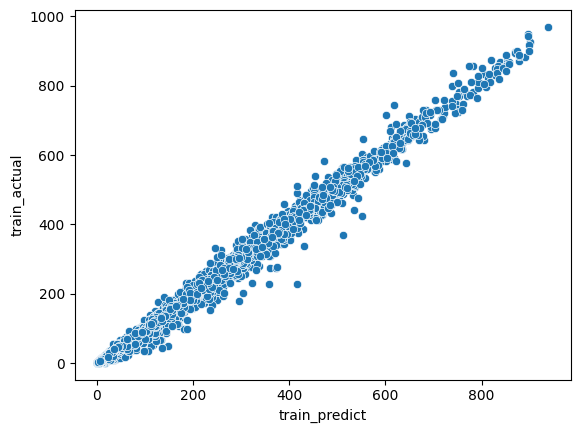

In [26]:
import seaborn as sns
print(model.score(X_train, y_train))
sns.scatterplot(data=for_plot, x='train_predict', y='train_actual')

0.9231867466830003


<Axes: xlabel='test_predict', ylabel='test_actual'>

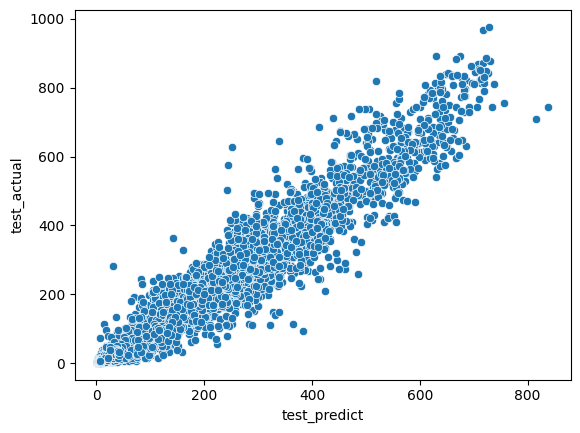

In [27]:
import seaborn as sns
print(model.score(X_test, y_test))
sns.scatterplot(data=for_plot, x='test_predict', y='test_actual')

1.0


<Axes: xlabel='train_predict', ylabel='train_actual'>

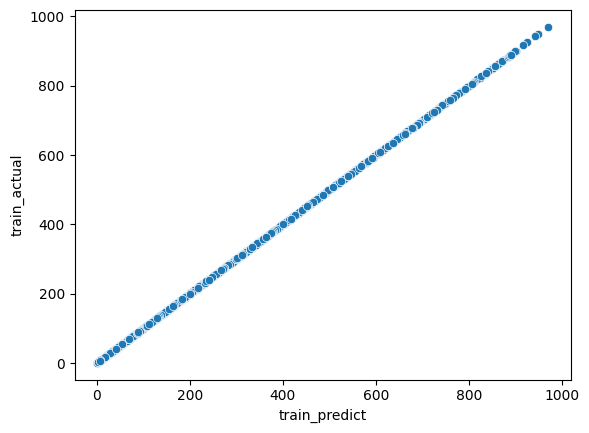

In [28]:
import seaborn as sns
print(model_dt.score(X_train, y_train))
sns.scatterplot(data=for_plot_dt, x='train_predict', y='train_actual')

0.8604665144307124


<Axes: xlabel='test_predict', ylabel='test_actual'>

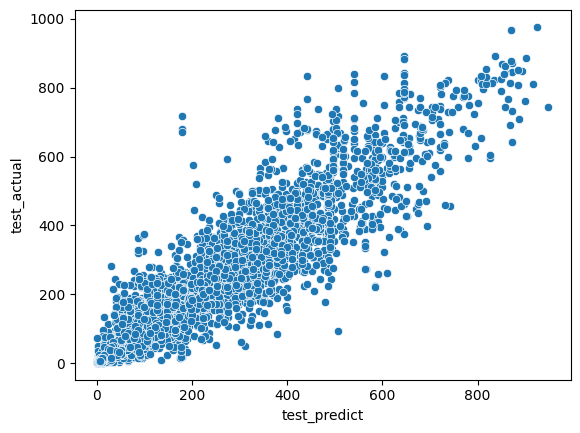

In [29]:
import seaborn as sns
print(model_dt.score(X_test, y_test))
sns.scatterplot(data=for_plot_dt, x='test_predict', y='test_actual')

<Axes: xlabel='test_predict', ylabel='test_actual'>

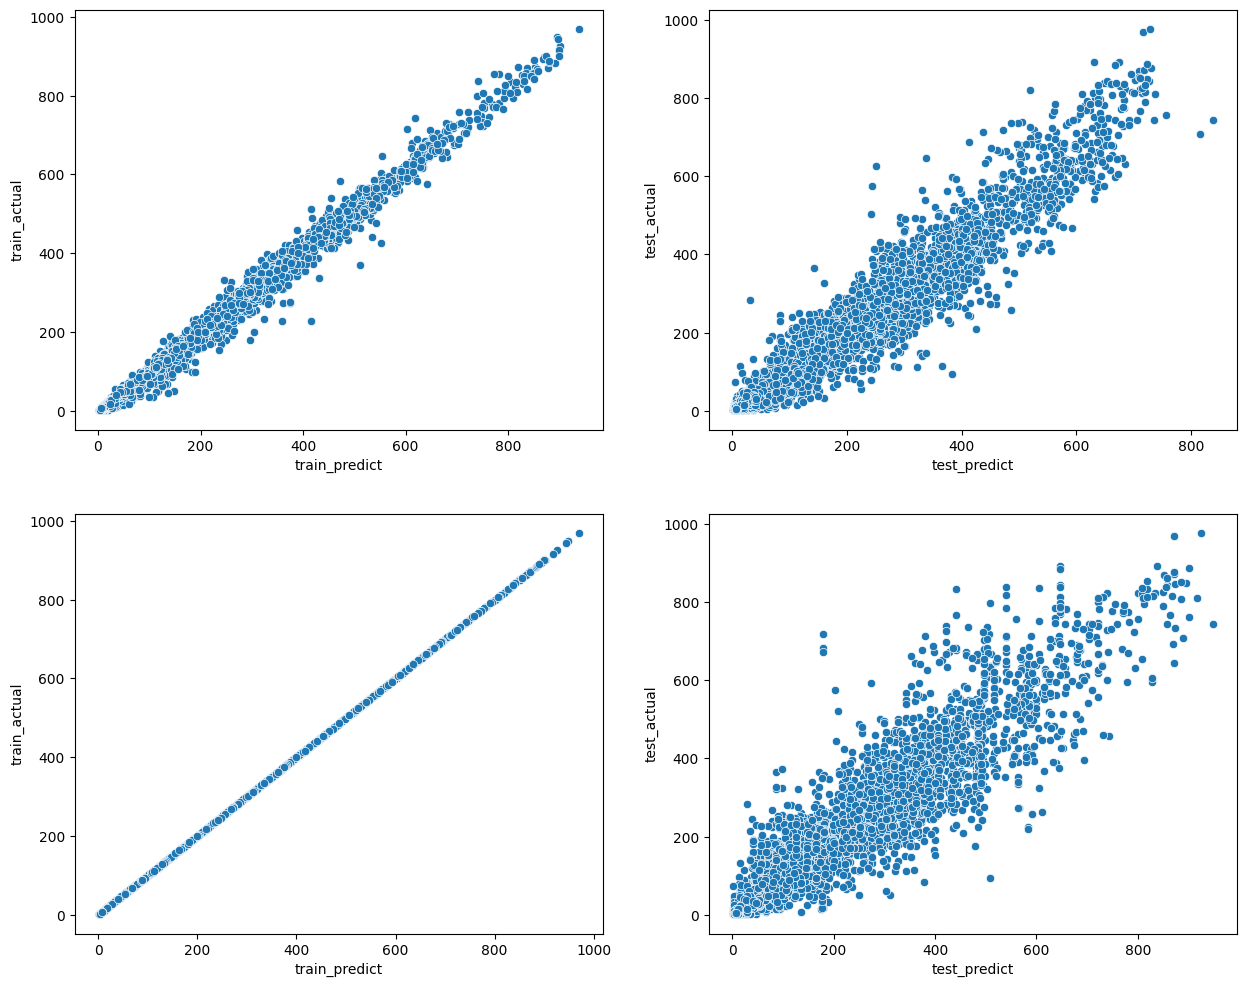

In [30]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
sns.scatterplot(data=for_plot, x='train_predict', y='train_actual', ax=ax1)
sns.scatterplot(data=for_plot, x='test_predict', y='test_actual', ax=ax2)
sns.scatterplot(data=for_plot_dt, x='train_predict', y='train_actual', ax=ax3)
sns.scatterplot(data=for_plot_dt, x='test_predict', y='test_actual', ax=ax4)

# feature selection
- 과적합을 방지하고, 일반화를 달성하기 위해 사용하는 방법
- filter, wrapper, embeded

feature selection은 주어진 데이터에서 중요한 변수를 선택하고, 조금 덜 중요한 변수흫 제거하여
모델의 성능과 해석 가능성을 향시키는 과정.
이때 과적합을 방지하고, 일반화를 달성하기 위해 사용하는 방법으로 이과정은 데이터 전처리 단계에서
수행되며, 선택된 변수는 다음 단계 모델 학습에 사용됨

# Feature Selection이 필요성
- 과적합 방지 : 불필요한 변수를 제거함으로써 모델이 불필요한 패턴을 학습하는 것을 방지
- 모델 성능 향상 : 노이즈를 줄이고 중요한 정보만 사용하여 모델의 정확도를 향상
- 계산 비용 감소 : 변수가 적으면 학습 및 예측 시간을 단축
- 모델해석이 용이성 : 중요한 변수만으로 구성된 모델은 핵석하기가 쉬움(이해도가 높음)

# Feature Selection이 유형

## 필터 방법( filter Methods) 
- 기초 통계량을 기반으로 feature 간의 관계에서 높은 상관계수(영향력)을 가지는 feature를 사용하는 방법
- 예) 표준편차가 0에 가까우면(해당 column에 저장된 데이터들이 거의 동일) 해당 feature를 삭제
- filter 방식이 유효한 경우는 분야마다 차이가 있음

- Chi-Square Test, ANOVA, Mutual Information
- 

## 랩퍼 방법 (Wrapper Methods)
- 특정 머신러닝 모델을 활용하여 변수의 중요성 평가
- 예) Forward Selection, Backword Elimiobation, Recurcive Feature Elimination(RFE)

## 임베디드 방법 ( Embeded Methods )
- 모델 학습 과정에서 변수의 중요도를 계산하여 선택
- 예) Lasso Regression, Random Forest Feature Importance

### Feature Selection 방법론
- 필터 방법 : Variance Threshold
    - 변수 간 분산산이 낮은 경우 제거

- 랩퍼 방법 : Recurcive Deature Elimination(RFE)
    - 모델을 반복적으로 학습하면서 중요도가 낮은 변수를 제거

- 임베디드 방법 : Lasso Regression
    - L1 정규화를 통해 가중티가 0이 되는 변수 제거


In [31]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# 데이터 로드
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [32]:
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['TARGET'] = housing.target

# 데이터 확인
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  TARGET  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [33]:
from sklearn.feature_selection import VarianceThreshold  # 필터 방법

# 분산 기준 설정
thresghold = 0.1
selector = VarianceThreshold(threshold=thresghold)
data_selected = selector.fit_transform(data)

print(f"선택된 변수 수: {data_selected.shape[1]}") 

선택된 변수 수: 9


In [34]:
# Recurcive Deature Elimination(RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# 모델 설정 및 RFE 적용
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(data.iloc[:,:-1], data['TARGET'])

# 션택된 변수 출력
selected_features = data.columns[:-1][rfe.support_]
print(f"선택된 변수: {selected_features.tolist()}")

선택된 변수: ['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']


In [35]:
from sklearn.linear_model import Lasso

# 모델 학습

lasso = Lasso(alpha=0.1)
lasso.fit(data.iloc[:,:-1], data['TARGET'])

# 중요도 기반 벼누 선택 : 임제디드 변수 선택
lasso_selected = data.columns[:-1][lasso.coef_ !=0]
print(f"선택된 변수 : {lasso_selected.tolist()}")

선택된 변수 : ['MedInc', 'HouseAge', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# Filter 방식
- 기초 통게량을 기반으로 feature 간의 관계에서 높은 상관계수(영향력)을 가지는 feature를 사용하는 방법
- e.g: 표준편차가 0에 가까우면 (해당column에 저장된 데이터들이 거의 동일)해당 feature를 삭제
- filter 방식이 유효한 경우는 분야마다 차이가 있음

In [36]:
import pandas as pd

df = pd.read_csv('train.csv')
print(df)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

In [37]:
df.head().T

,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0.0,0.0,0.0,0.0,0.0
casual,3,8,5,3,0


In [38]:
df['year'] = df['datetime'].apply(lambda x: int(x.split(' ')[0].split('-')[0]))
df['month'] = df['datetime'].apply(lambda x: int(x.split(' ')[0].split('-')[1]))
df['day'] = df['datetime'].apply(lambda x: int(x.split(' ')[0].split('-')[2]))

df['hour'] = df['datetime'].apply(lambda x: int(x.split(' ')[1].split(':')[0]))
df['minute'] = df['datetime'].apply(lambda x: int(x.split(' ')[1].split(':')[1]))
df['second'] = df['datetime'].apply(lambda x: int(x.split(' ')[1].split(':')[2]))

df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [39]:
sample_dt = '2011-01-01 00:00:00'

In [40]:
parsed = pd.to_datetime(sample_dt)
parsed.dayofweek

5

In [41]:
df['dayofweek'] = df['datetime'].apply(lambda x: pd.to_datetime(x).dayofweek)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


In [42]:
set(df['dayofweek'])

{0, 1, 2, 3, 4, 5, 6}

In [43]:
df.describe()  # 기초 통계값

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0,6.000000


In [44]:
df.describe().T.sort_values(by='std')['std']

minute          0.000000
second          0.000000
holiday         0.166599
workingday      0.466159
year            0.500019
weather         0.633839
season          1.116174
dayofweek       2.004585
month           3.444373
day             5.476608
hour            6.915838
temp            7.791590
windspeed       8.164537
atemp           8.474601
humidity       19.245033
casual         49.960477
registered    151.039033
count         181.144454
Name: std, dtype: float64

# wrapper
- feature를 하나씩 넣고, 빼면서 평가지표 점수 확인 -> 시행착오를 거친다.
- forward Selection(전지 선택), Backward Elimination(후반 제거), stepwirse Selection(단계별 선택)

In [45]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [46]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'hour', 'dayofweek']
label = 'count'

# train-test split

train, test = df[0::2], df[1::2]
train, test = train.reset_index(), test.reset_index()

X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9262487503318035

In [47]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'dayofweek']
label = 'count'

# train-test split

train, test = df[0::2], df[1::2]
train, test = train.reset_index(), test.reset_index()

X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.4998855688463133

In [48]:
from sklearn.feature_selection import RFE

selector = RFE(estimator=model)
selector.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor())

In [49]:
selector.ranking_ 

array([5, 7, 6, 4, 1, 1, 1, 1, 3, 2, 1])

In [50]:
rfe_df = pd.DataFrame()
rfe_df['rank'] = selector.ranking_
rfe_df['feature'] = features

In [51]:
rfe_df.sort_values(by='rank')

,rank,feature
7,1,windspeed
6,1,humidity
5,1,atemp
4,1,temp
10,1,dayofweek
9,2,month
8,3,year
3,4,weather
0,5,season
2,6,workingday
